In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


%matplotlib inline

/kaggle/input/userinterest/E-commerce.xlsx


In [100]:
df_questions = pd.read_excel("/kaggle/input/userinterest/E-commerce.xlsx", sheet_name = "sheet2")
df = pd.read_excel("/kaggle/input/userinterest/E-commerce.xlsx", sheet_name = "sheet1")

df_questions

,Questions
0,Q1 = What state is your residence
1,Q2 = What is your gender
2,Q3 = Do you know what e-commerce entails
3,Q4 = Are you a user of e-commerce
4,Q5 = How often do you shop online
5,Q6 = Are you satisfied with online shopping in...
6,Q7 = Which brand do you patronize the most ove...
7,Q8 = Which means of trading do you prefer
8,Q9 = What is your major challenge in shopping ...
9,Q10 = How would you rate your experience shopp...


In [101]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,Lagos state,Female,"Yes, Very Well",Yes,Very frequently,Yes,Shopitstoresng,Online Trading,Logistics fee,Excellent
1,Ogun State,Female,"Yes, Very Well",Yes,Very frequently,Yes,Jumia,Online Trading,Poor delivery time,Good
2,Ogun State,Female,"No, I have no idea",No,Very frequently,Yes,Limat ventures,Traditional trading (Physical Market),Poor delivery time,Fair
3,Ondo State,Male,"Yes, Very Well",Yes,Occasionally,No,Jumia,Online Trading,Product not good,Fair
4,Lagos state,Male,"Yes, Very Well",Yes,Very frequently,No,Jumia,Online Trading,Product not good,Fair


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      110 non-null    object
 1   Q2      110 non-null    object
 2   Q3      110 non-null    object
 3   Q4      110 non-null    object
 4   Q5      110 non-null    object
 5   Q6      110 non-null    object
 6   Q7      110 non-null    object
 7   Q8      110 non-null    object
 8   Q9      110 non-null    object
 9   Q10     110 non-null    object
dtypes: object(10)
memory usage: 8.7+ KB


In [103]:
dfe = df.copy()

In [104]:
dfe["Q1"].value_counts()

Q1
Ondo State     39
Lagos state    35
Ogun State     22
Osun State     14
Name: count, dtype: int64

In [105]:
dummies = pd.get_dummies(dfe['Q1'], drop_first = True)
dfe = pd.concat([dfe.drop('Q1', axis = 1), dummies], axis = 1)
dfe.head()

,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Ogun State,Ondo State,Osun State
0,Female,"Yes, Very Well",Yes,Very frequently,Yes,Shopitstoresng,Online Trading,Logistics fee,Excellent,False,False,False
1,Female,"Yes, Very Well",Yes,Very frequently,Yes,Jumia,Online Trading,Poor delivery time,Good,True,False,False
2,Female,"No, I have no idea",No,Very frequently,Yes,Limat ventures,Traditional trading (Physical Market),Poor delivery time,Fair,True,False,False
3,Male,"Yes, Very Well",Yes,Occasionally,No,Jumia,Online Trading,Product not good,Fair,False,True,False
4,Male,"Yes, Very Well",Yes,Very frequently,No,Jumia,Online Trading,Product not good,Fair,False,False,False


In [106]:
dummies = pd.get_dummies(dfe['Q2'], drop_first = True)
dfe = pd.concat([dfe.drop('Q2', axis = 1), dummies], axis = 1)
dfe.head()

,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Ogun State,Ondo State,Osun State,Male
0,"Yes, Very Well",Yes,Very frequently,Yes,Shopitstoresng,Online Trading,Logistics fee,Excellent,False,False,False,False
1,"Yes, Very Well",Yes,Very frequently,Yes,Jumia,Online Trading,Poor delivery time,Good,True,False,False,False
2,"No, I have no idea",No,Very frequently,Yes,Limat ventures,Traditional trading (Physical Market),Poor delivery time,Fair,True,False,False,False
3,"Yes, Very Well",Yes,Occasionally,No,Jumia,Online Trading,Product not good,Fair,False,True,False,True
4,"Yes, Very Well",Yes,Very frequently,No,Jumia,Online Trading,Product not good,Fair,False,False,False,True


In [107]:
dummies = pd.get_dummies(dfe['Q3'], drop_first = True)
dfe = pd.concat([dfe.drop('Q3', axis = 1), dummies], axis = 1)
dfe.head()

,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Ogun State,Ondo State,Osun State,Male,"No, I have no idea","Yes, Very Well"
0,Yes,Very frequently,Yes,Shopitstoresng,Online Trading,Logistics fee,Excellent,False,False,False,False,False,True
1,Yes,Very frequently,Yes,Jumia,Online Trading,Poor delivery time,Good,True,False,False,False,False,True
2,No,Very frequently,Yes,Limat ventures,Traditional trading (Physical Market),Poor delivery time,Fair,True,False,False,False,True,False
3,Yes,Occasionally,No,Jumia,Online Trading,Product not good,Fair,False,True,False,True,False,True
4,Yes,Very frequently,No,Jumia,Online Trading,Product not good,Fair,False,False,False,True,False,True


In [108]:
dummies = pd.get_dummies(dfe['Q4'], drop_first = True)
dfe = pd.concat([dfe.drop('Q4', axis = 1), dummies], axis = 1)
dfe.head()

,Q5,Q6,Q7,Q8,Q9,Q10,Ogun State,Ondo State,Osun State,Male,"No, I have no idea","Yes, Very Well",Yes
0,Very frequently,Yes,Shopitstoresng,Online Trading,Logistics fee,Excellent,False,False,False,False,False,True,True
1,Very frequently,Yes,Jumia,Online Trading,Poor delivery time,Good,True,False,False,False,False,True,True
2,Very frequently,Yes,Limat ventures,Traditional trading (Physical Market),Poor delivery time,Fair,True,False,False,False,True,False,False
3,Occasionally,No,Jumia,Online Trading,Product not good,Fair,False,True,False,True,False,True,True
4,Very frequently,No,Jumia,Online Trading,Product not good,Fair,False,False,False,True,False,True,True


In [109]:
dummies = pd.get_dummies(dfe['Q5'], drop_first = True)
dfe = pd.concat([dfe.drop('Q5', axis = 1), dummies], axis = 1)
dfe.head()

,Q6,Q7,Q8,Q9,Q10,Ogun State,Ondo State,Osun State,Male,"No, I have no idea","Yes, Very Well",Yes,Occasionally,Very frequently
0,Yes,Shopitstoresng,Online Trading,Logistics fee,Excellent,False,False,False,False,False,True,True,False,True
1,Yes,Jumia,Online Trading,Poor delivery time,Good,True,False,False,False,False,True,True,False,True
2,Yes,Limat ventures,Traditional trading (Physical Market),Poor delivery time,Fair,True,False,False,False,True,False,False,False,True
3,No,Jumia,Online Trading,Product not good,Fair,False,True,False,True,False,True,True,True,False
4,No,Jumia,Online Trading,Product not good,Fair,False,False,False,True,False,True,True,False,True


In [110]:
dummies = pd.get_dummies(dfe['Q7'], drop_first = True)
dfe = pd.concat([dfe.drop('Q7', axis = 1), dummies], axis = 1)
dfe.head()

,Q6,Q8,Q9,Q10,Ogun State,Ondo State,Osun State,Male,"No, I have no idea","Yes, Very Well",Yes,Occasionally,Very frequently,Jumia,Konga,Limat ventures,Olx,Ritzy world fashion,Shopitstoresng,Wish
0,Yes,Online Trading,Logistics fee,Excellent,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,False
1,Yes,Online Trading,Poor delivery time,Good,True,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False
2,Yes,Traditional trading (Physical Market),Poor delivery time,Fair,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False
3,No,Online Trading,Product not good,Fair,False,True,False,True,False,True,True,True,False,True,False,False,False,False,False,False
4,No,Online Trading,Product not good,Fair,False,False,False,True,False,True,True,False,True,True,False,False,False,False,False,False


In [111]:
dummies = pd.get_dummies(dfe['Q8'], drop_first = True)
dfe = pd.concat([dfe.drop('Q8', axis = 1), dummies], axis = 1)
dfe.head()

,Q6,Q9,Q10,Ogun State,Ondo State,Osun State,Male,"No, I have no idea","Yes, Very Well",Yes,Occasionally,Very frequently,Jumia,Konga,Limat ventures,Olx,Ritzy world fashion,Shopitstoresng,Wish,Traditional trading (Physical Market)
0,Yes,Logistics fee,Excellent,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,False,False
1,Yes,Poor delivery time,Good,True,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False
2,Yes,Poor delivery time,Fair,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True
3,No,Product not good,Fair,False,True,False,True,False,True,True,True,False,True,False,False,False,False,False,False,False
4,No,Product not good,Fair,False,False,False,True,False,True,True,False,True,True,False,False,False,False,False,False,False


In [112]:
dummies = pd.get_dummies(dfe['Q10'], drop_first = True)
dfe = pd.concat([dfe.drop('Q10', axis = 1), dummies], axis = 1)
dfe.head()

,Q6,Q9,Ogun State,Ondo State,Osun State,Male,"No, I have no idea","Yes, Very Well",Yes,Occasionally,...,Konga,Limat ventures,Olx,Ritzy world fashion,Shopitstoresng,Wish,Traditional trading (Physical Market),Excellent,Fair,Good
0,Yes,Logistics fee,False,False,False,False,False,True,True,False,...,False,False,False,False,True,False,False,True,False,False
1,Yes,Poor delivery time,True,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
2,Yes,Poor delivery time,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
3,No,Product not good,False,True,False,True,False,True,True,True,...,False,False,False,False,False,False,False,False,True,False
4,No,Product not good,False,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,True,False


In [113]:
# plt.figure(figsize = (17,15))
# sns.heatmap(dfe.corr(), annot = True)

In [114]:
dfe.head()

,Q6,Q9,Ogun State,Ondo State,Osun State,Male,"No, I have no idea","Yes, Very Well",Yes,Occasionally,...,Konga,Limat ventures,Olx,Ritzy world fashion,Shopitstoresng,Wish,Traditional trading (Physical Market),Excellent,Fair,Good
0,Yes,Logistics fee,False,False,False,False,False,True,True,False,...,False,False,False,False,True,False,False,True,False,False
1,Yes,Poor delivery time,True,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
2,Yes,Poor delivery time,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
3,No,Product not good,False,True,False,True,False,True,True,True,...,False,False,False,False,False,False,False,False,True,False
4,No,Product not good,False,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,True,False


In [115]:
dfe = dfe.drop("Q6", axis = 1)
dfe.head()

,Q9,Ogun State,Ondo State,Osun State,Male,"No, I have no idea","Yes, Very Well",Yes,Occasionally,Very frequently,...,Konga,Limat ventures,Olx,Ritzy world fashion,Shopitstoresng,Wish,Traditional trading (Physical Market),Excellent,Fair,Good
0,Logistics fee,False,False,False,False,False,True,True,False,True,...,False,False,False,False,True,False,False,True,False,False
1,Poor delivery time,True,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,True
2,Poor delivery time,True,False,False,False,True,False,False,False,True,...,False,True,False,False,False,False,True,False,True,False
3,Product not good,False,True,False,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,True,False
4,Product not good,False,False,False,True,False,True,True,False,True,...,False,False,False,False,False,False,False,False,True,False


In [116]:
dfe['Q9'].value_counts()

Q9
Product not good                                                                                   41
Poor delivery time                                                                                 32
Fraudulent activities                                                                              27
Logistics fee                                                                                       1
 Quality of materials might not be up to standard                                                   1
Sometimes the product you see online is not what you gt physically when it's delivered to you.      1
All of the above                                                                                    1
Product description does not goes with the item delivered                                           1
Often times, you do not get the quality you want                                                    1
Product Displayed online mostimes different what is delivered                  

In [117]:
dfe['Q9'] = dfe['Q9'].map(lambda x: 'Fraudulent activities' if x == 'Delayed response on the part of the vendor .' or x == 'Product description does not goes with the item delivered' 
or x == 'All of the above' or x == 'Product Displayed online mostimes different what is delivered' or x == 'Logistics fee' or x == ' Quality of materials might not be up to standard' or x == "Sometimes the product you see online is not what you gt physically when it's delivered to you."
or x == 'Often times, you do not get the quality you want' or x == 'Product not as quality as it looks online' or x == 'Not delivering what you exactly ordered for'
else x)
dfe['Q9'].value_counts()

Q9
Product not good                                                                                   41
Fraudulent activities                                                                              32
Poor delivery time                                                                                 32
Sometimes the product you see online is not what you gt physically when it's delivered to you.      1
All of the above                                                                                    1
Product description does not goes with the item delivered                                           1
Product Displayed online mostimes different what is delivered                                       1
Product not as quality as it looks online                                                           1
Name: count, dtype: int64

In [118]:
dfe['Q9'] = dfe['Q9'].map(lambda x: 'Fraudulent activities' if x == 'Product Displayed online mostimes different what is delivered ' or x == "Sometimes the product you see online is not what you gt physically when it's delivered to you. " else x)
dfe['Q9'].value_counts()

Q9
Product not good                                              41
Fraudulent activities                                         34
Poor delivery time                                            32
All of the above                                               1
Product description does not goes with the item delivered      1
Product not as quality as it looks online                      1
Name: count, dtype: int64

In [119]:
dummies = pd.get_dummies(dfe['Q9'], drop_first = True)
dfe = pd.concat([dfe.drop('Q9', axis = 1), dummies], axis = 1)
dfe.head()

,Ogun State,Ondo State,Osun State,Male,"No, I have no idea","Yes, Very Well",Yes,Occasionally,Very frequently,Jumia,...,Wish,Traditional trading (Physical Market),Excellent,Fair,Good,Fraudulent activities,Poor delivery time,Product description does not goes with the item delivered,Product not as quality as it looks online,Product not good
0,False,False,False,False,False,True,True,False,True,False,...,False,False,True,False,False,True,False,False,False,False
1,True,False,False,False,False,True,True,False,True,True,...,False,False,False,False,True,False,True,False,False,False
2,True,False,False,False,True,False,False,False,True,False,...,False,True,False,True,False,False,True,False,False,False
3,False,True,False,True,False,True,True,True,False,True,...,False,False,False,True,False,False,False,False,False,True
4,False,False,False,True,False,True,True,False,True,True,...,False,False,False,True,False,False,False,False,False,True


<Axes: >

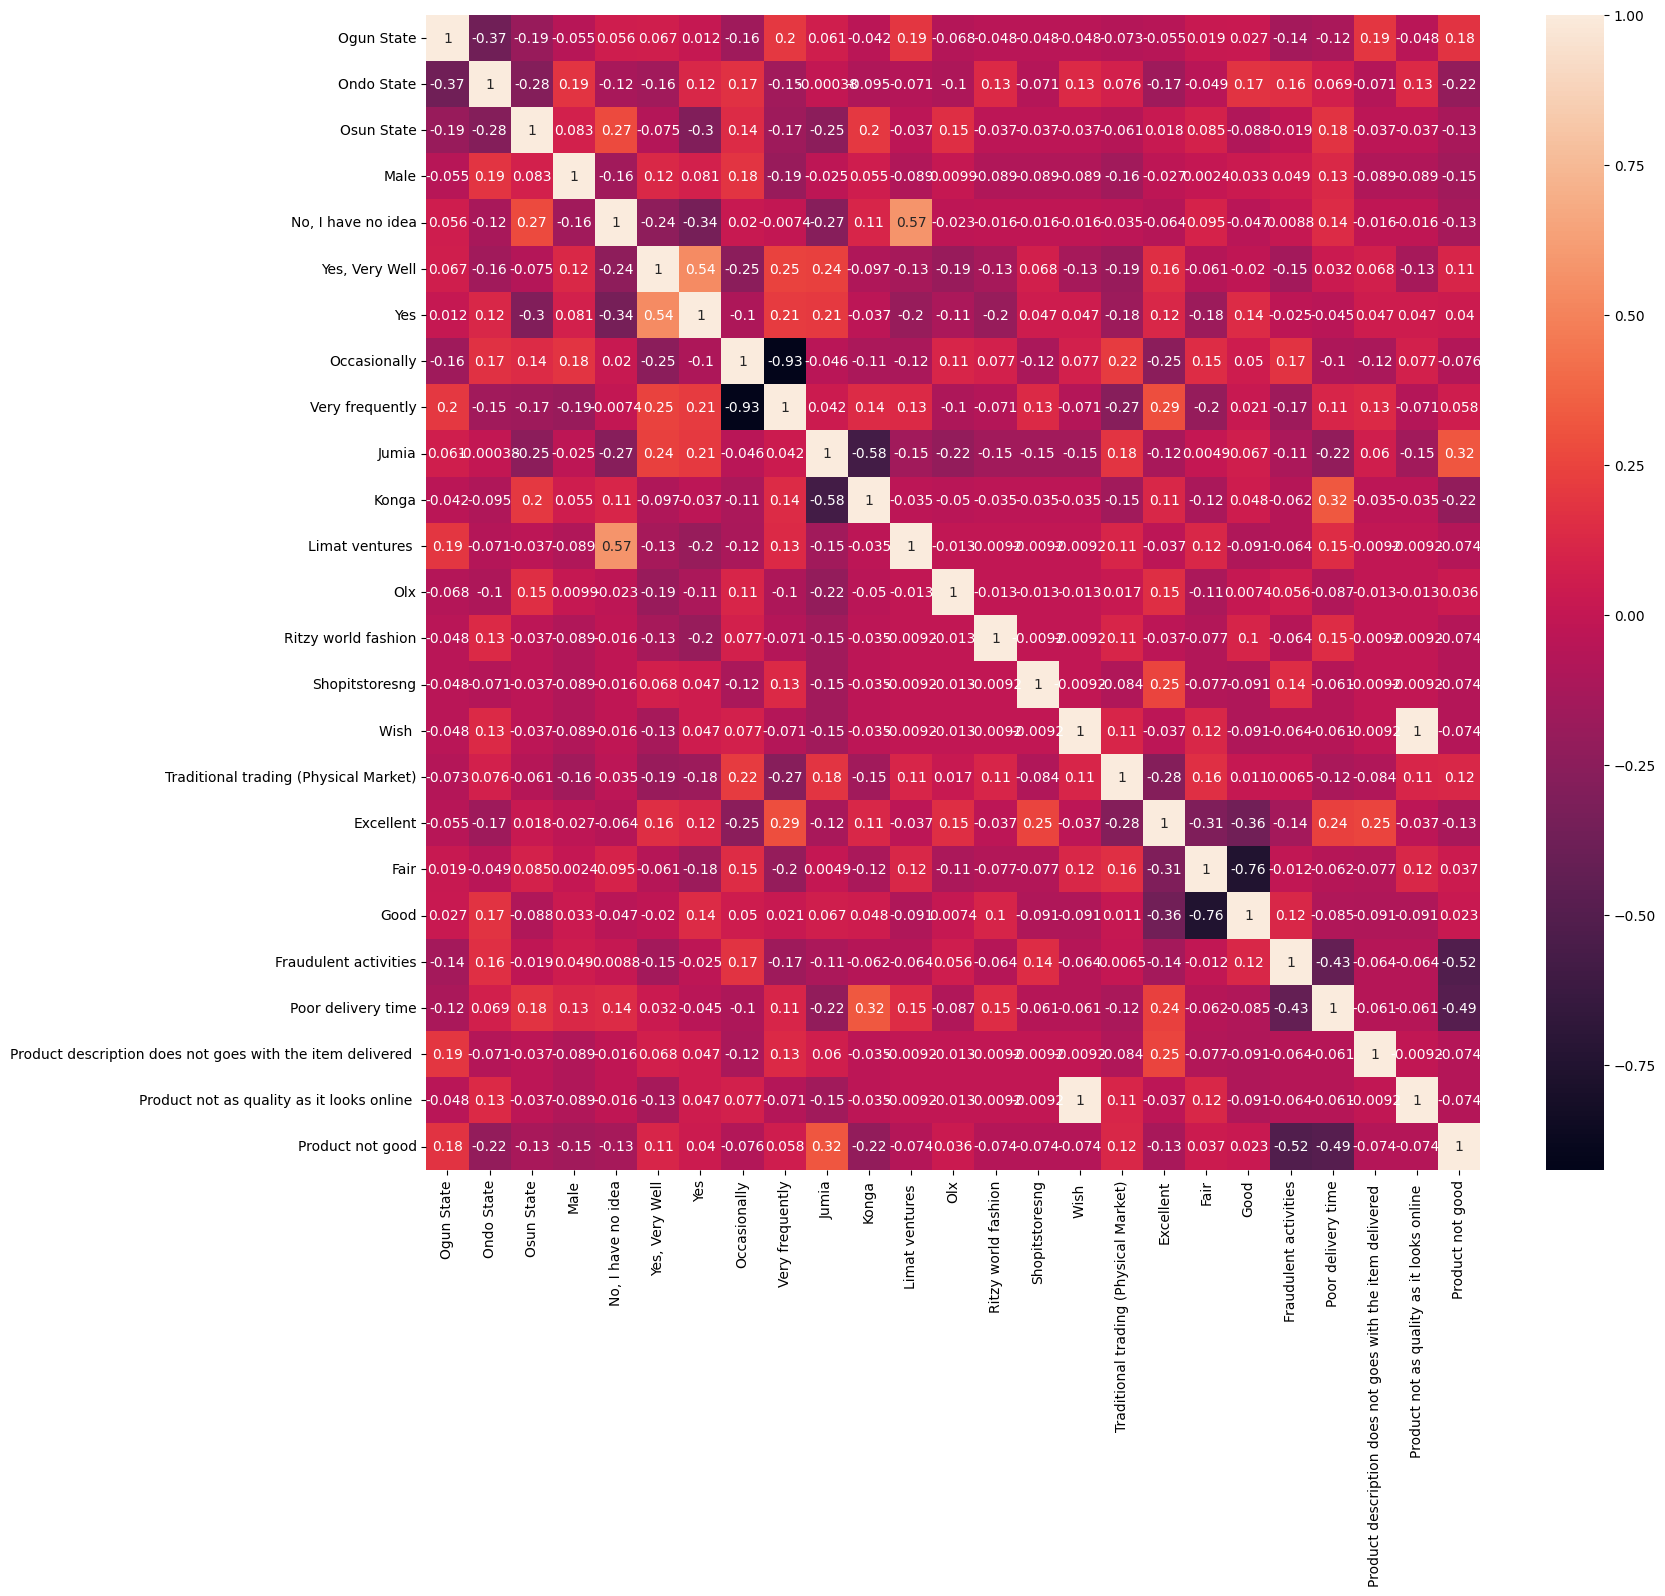

In [120]:
plt.figure(figsize = (17,15))
sns.heatmap(dfe.corr(), annot = True)

In [121]:
dfe = dfe.drop(['Olx','Ritzy world fashion','Shopitstoresng'], axis = 1)
dfe.head()

,Ogun State,Ondo State,Osun State,Male,"No, I have no idea","Yes, Very Well",Yes,Occasionally,Very frequently,Jumia,...,Wish,Traditional trading (Physical Market),Excellent,Fair,Good,Fraudulent activities,Poor delivery time,Product description does not goes with the item delivered,Product not as quality as it looks online,Product not good
0,False,False,False,False,False,True,True,False,True,False,...,False,False,True,False,False,True,False,False,False,False
1,True,False,False,False,False,True,True,False,True,True,...,False,False,False,False,True,False,True,False,False,False
2,True,False,False,False,True,False,False,False,True,False,...,False,True,False,True,False,False,True,False,False,False
3,False,True,False,True,False,True,True,True,False,True,...,False,False,False,True,False,False,False,False,False,True
4,False,False,False,True,False,True,True,False,True,True,...,False,False,False,True,False,False,False,False,False,True


<Axes: >

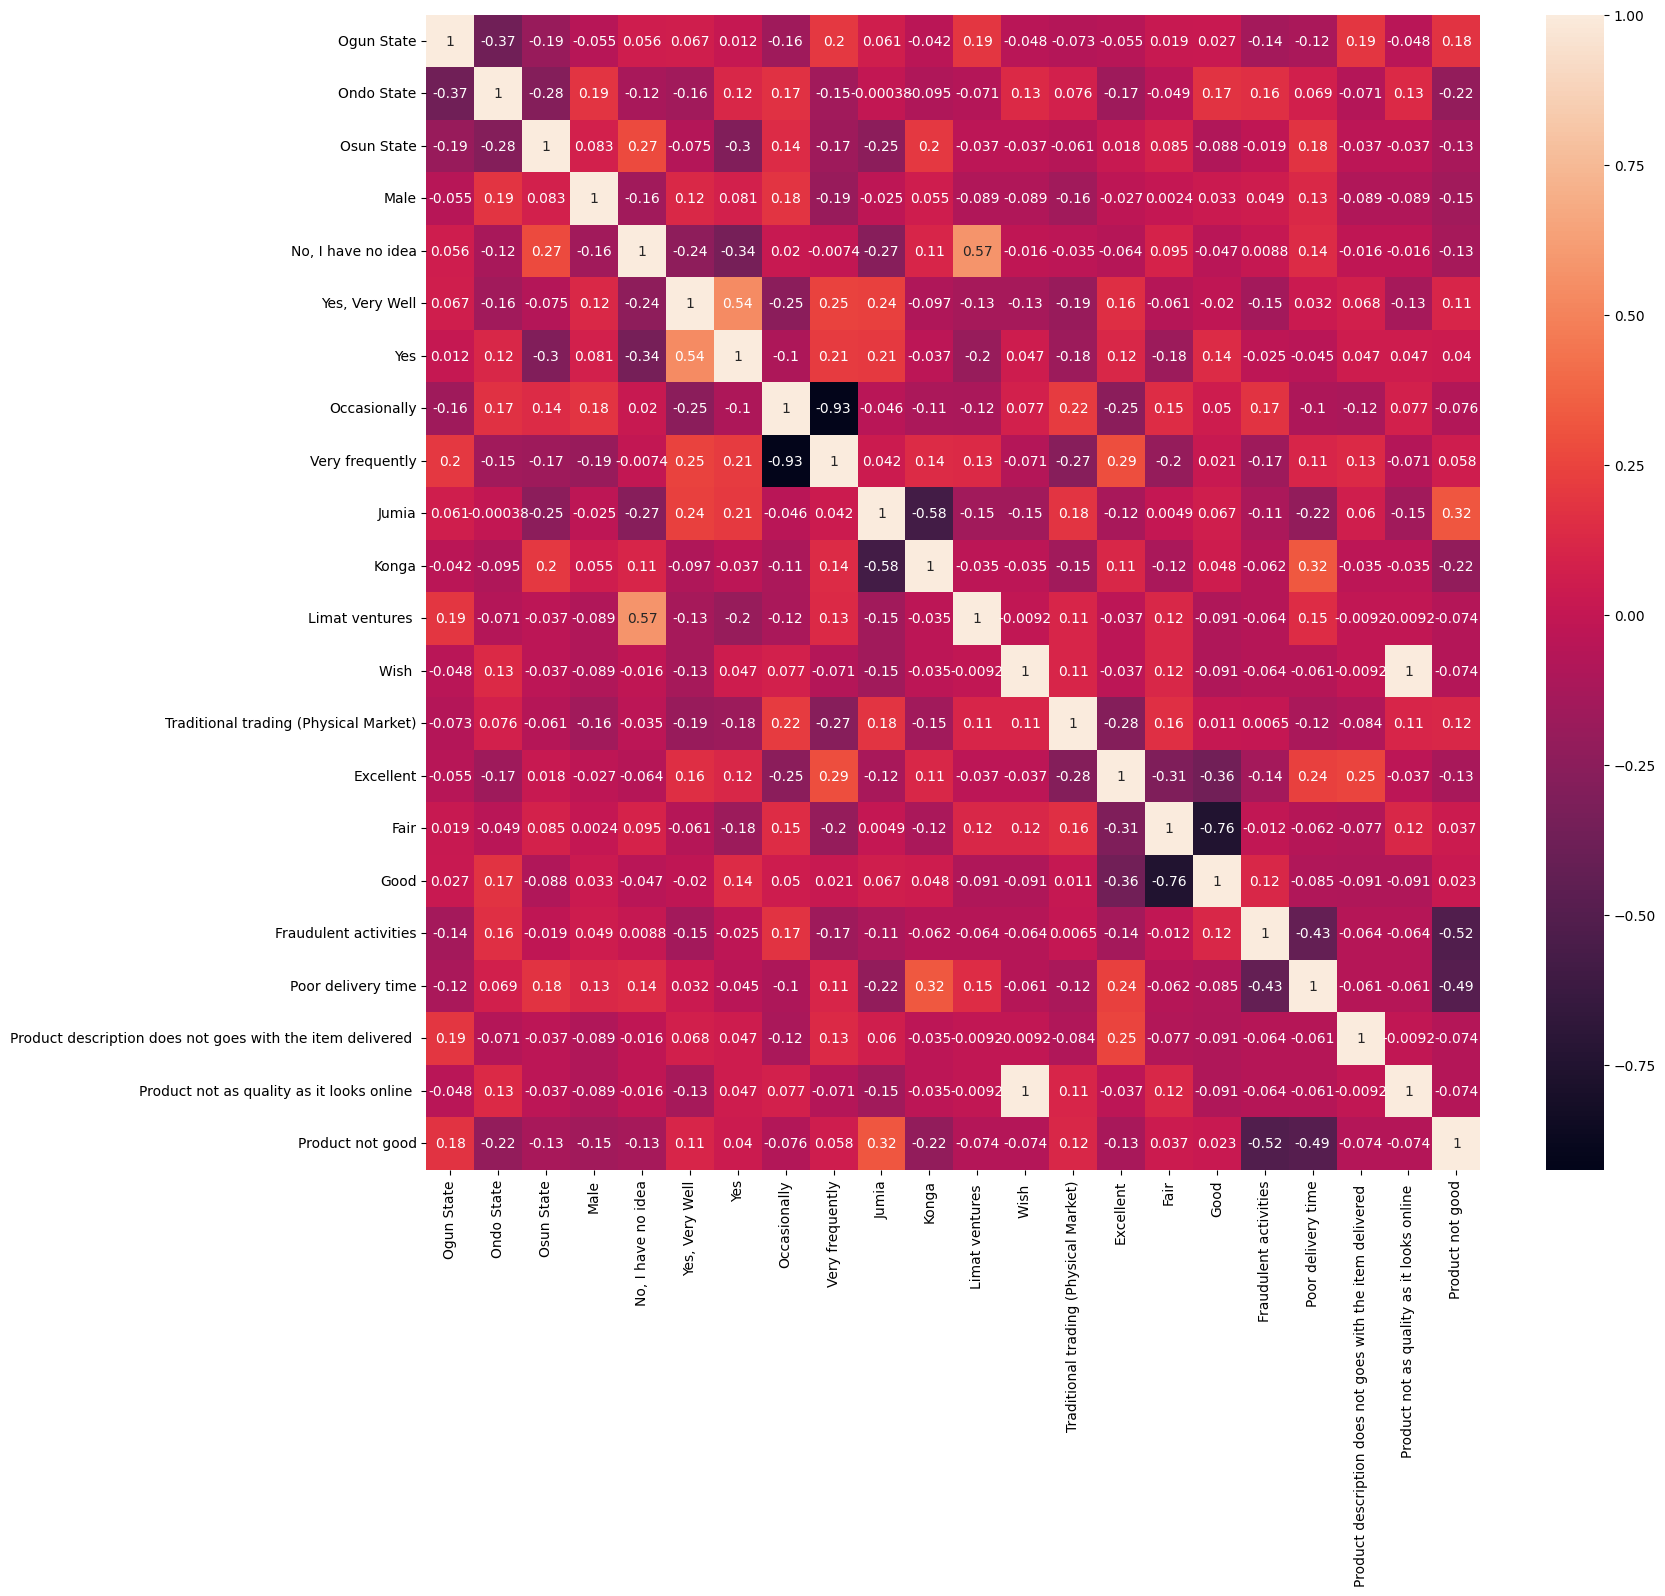

In [122]:
plt.figure(figsize = (17,15))
sns.heatmap(dfe.corr(), annot = True)

In [123]:
dfe = dfe.drop("Wish ",axis = 1)
dfe.head()

,Ogun State,Ondo State,Osun State,Male,"No, I have no idea","Yes, Very Well",Yes,Occasionally,Very frequently,Jumia,...,Limat ventures,Traditional trading (Physical Market),Excellent,Fair,Good,Fraudulent activities,Poor delivery time,Product description does not goes with the item delivered,Product not as quality as it looks online,Product not good
0,False,False,False,False,False,True,True,False,True,False,...,False,False,True,False,False,True,False,False,False,False
1,True,False,False,False,False,True,True,False,True,True,...,False,False,False,False,True,False,True,False,False,False
2,True,False,False,False,True,False,False,False,True,False,...,True,True,False,True,False,False,True,False,False,False
3,False,True,False,True,False,True,True,True,False,True,...,False,False,False,True,False,False,False,False,False,True
4,False,False,False,True,False,True,True,False,True,True,...,False,False,False,True,False,False,False,False,False,True


# Solutions to Questions

In [124]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,Lagos state,Female,"Yes, Very Well",Yes,Very frequently,Yes,Shopitstoresng,Online Trading,Logistics fee,Excellent
1,Ogun State,Female,"Yes, Very Well",Yes,Very frequently,Yes,Jumia,Online Trading,Poor delivery time,Good
2,Ogun State,Female,"No, I have no idea",No,Very frequently,Yes,Limat ventures,Traditional trading (Physical Market),Poor delivery time,Fair
3,Ondo State,Male,"Yes, Very Well",Yes,Occasionally,No,Jumia,Online Trading,Product not good,Fair
4,Lagos state,Male,"Yes, Very Well",Yes,Very frequently,No,Jumia,Online Trading,Product not good,Fair


Q1
Ondo State     39
Lagos state    35
Ogun State     22
Osun State     14
Name: count, dtype: int64


<Axes: xlabel='Q1', ylabel='count'>

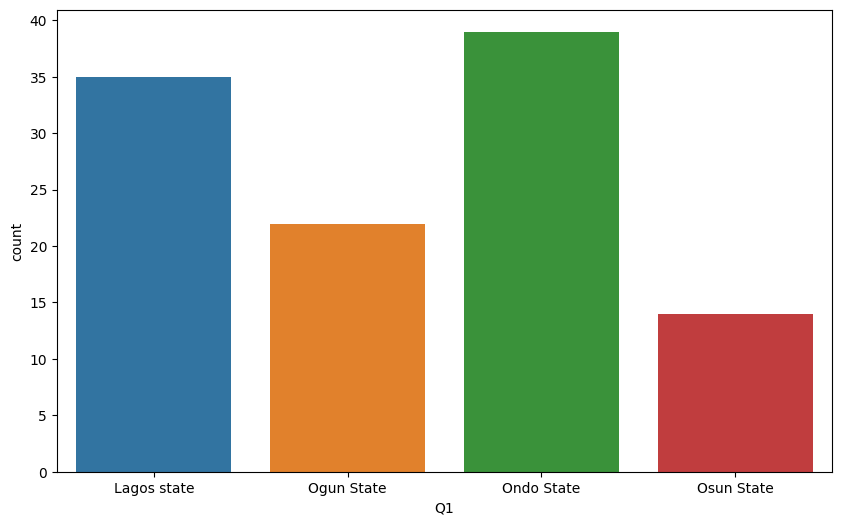

In [125]:
"""
1. THe highest number of state that answered the survey
"""

print(df['Q1'].value_counts())
plt.figure(figsize = (10,6))
sns.countplot(x = "Q1", data = df)

Q10
Good         52
Fair         43
Excellent    14
Bad           1
Name: count, dtype: int64


<Axes: xlabel='Q10', ylabel='count'>

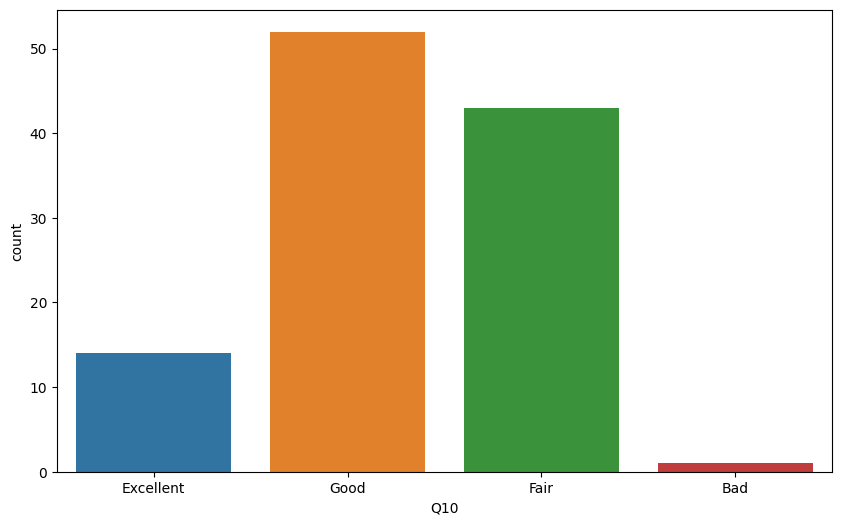

In [126]:
"""
2. Numbers of positive feedback and the no of negative feedback / Online trading experience
"""

print(df['Q10'].value_counts())
plt.figure(figsize = (10,6))
sns.countplot(x = "Q10", data = df)

Q7
Jumia                  79
Konga                  13
Jiji                   12
Olx                     2
Shopitstoresng          1
Limat ventures          1
Ritzy world fashion     1
Wish                    1
Name: count, dtype: int64


<Axes: xlabel='Q7', ylabel='count'>

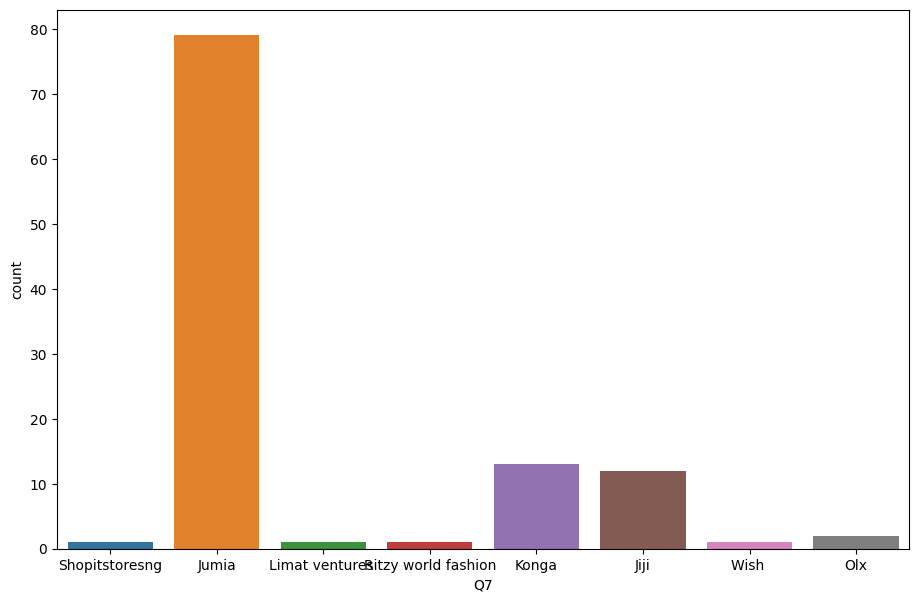

In [127]:
"""
3. The best ecommerce website according to sample response
"""

print(df['Q7'].value_counts())
plt.figure(figsize = (11,7))
sns.countplot(x = "Q7", data = df)

Q8
Online Trading                           62
Traditional trading (Physical Market)    48
Name: count, dtype: int64


<Axes: xlabel='Q8', ylabel='count'>

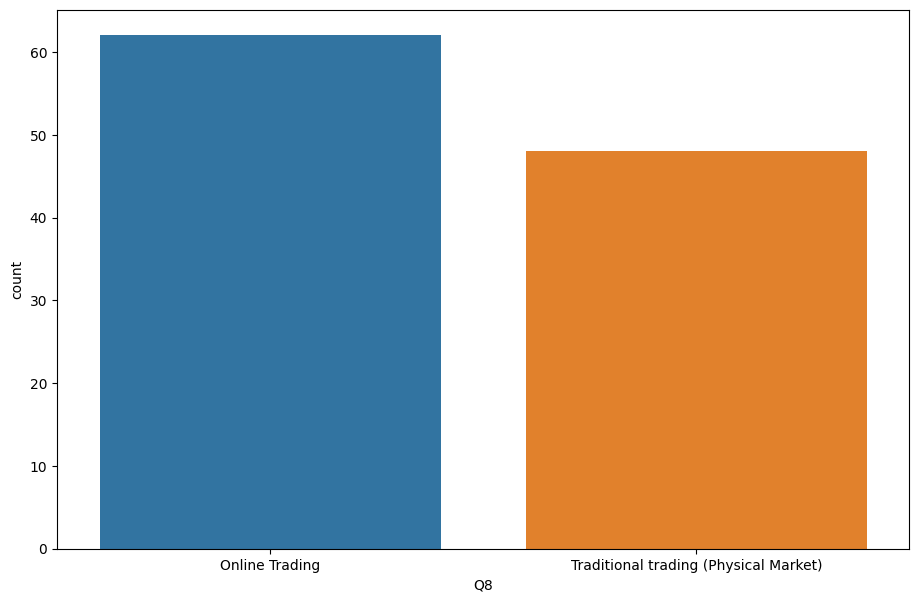

In [128]:
"""
4. What means of trading was most preferred
"""

print(df['Q8'].value_counts())
plt.figure(figsize = (11,7))
sns.countplot(x = "Q8", data = df)

Q9
Product not good                                              41
Fraudulent activities                                         34
Poor delivery time                                            32
All of the above                                               1
Product description does not goes with the item delivered      1
Product not as quality as it looks online                      1
Name: count, dtype: int64


<Axes: xlabel='Q9', ylabel='count'>

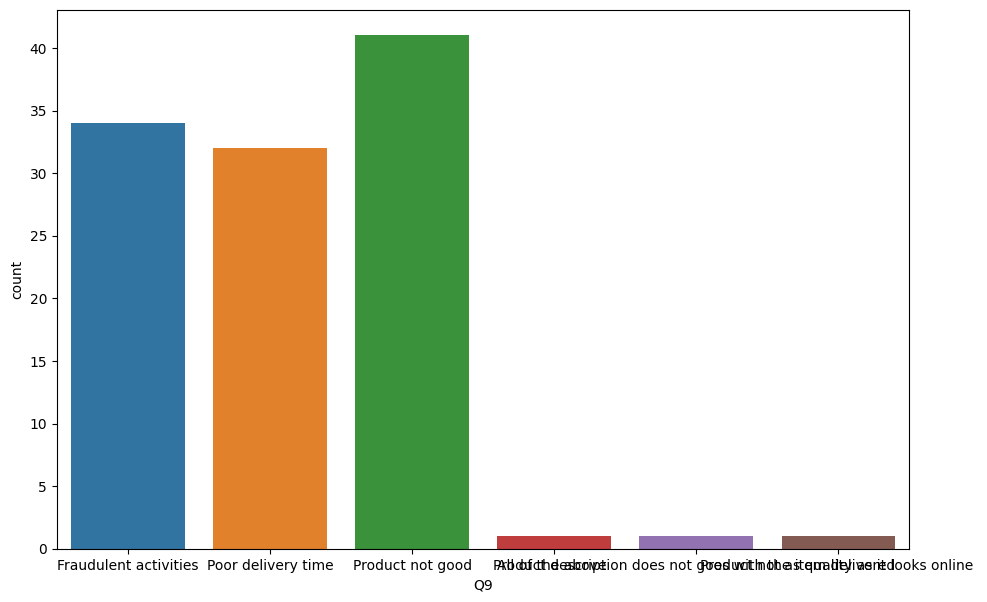

In [129]:
"""
5. Most challenges faced by end users
"""

df['Q9'] = df['Q9'].map(lambda x: 'Fraudulent activities' if x == 'Delayed response on the part of the vendor .' or x == 'Product description does not goes with the item delivered' 
or x == 'All of the above' or x == 'Product Displayed online mostimes different what is delivered' or x == 'Logistics fee' or x == ' Quality of materials might not be up to standard' or x == "Sometimes the product you see online is not what you gt physically when it's delivered to you."
or x == 'Often times, you do not get the quality you want' or x == 'Product not as quality as it looks online' or x == 'Not delivering what you exactly ordered for'
else x)
df['Q9'] = df['Q9'].map(lambda x: 'Fraudulent activities' if x == 'All of the above' or x == 'Product not as quality as it looks online' or x == 'Product Displayed online mostimes different what is delivered ' or x == "Sometimes the product you see online is not what you gt physically when it's delivered to you. " else x)

print(df['Q9'].value_counts())
plt.figure(figsize = (11,7))
sns.countplot(x = "Q9", data = df)

In [130]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 4: Encoding Categorical Data
label_encoder = LabelEncoder()

data = df
# Encode binary categorical variables
data['Q2'] = label_encoder.fit_transform(data['Q2'])  # Gender
data['Q4'] = label_encoder.fit_transform(data['Q4'])  # yes/no
data['Q3'] = label_encoder.fit_transform(data['Q3'])  # Familiarity with Online Trading
data['Q5'] = label_encoder.fit_transform(data['Q5'])  # Online Payment

# One-hot encode other categorical variables
data = pd.get_dummies(data, columns=['Q1', 'Q6', 'Q7', 'Q9', 'Q10'], drop_first=True)


# Step 7: Splitting Data
X = data.drop('Q8', axis=1)  # Features
y = data['Q8']  # Target variable
data.Q8.value_counts()

Q8
Online Trading                           62
Traditional trading (Physical Market)    48
Name: count, dtype: int64

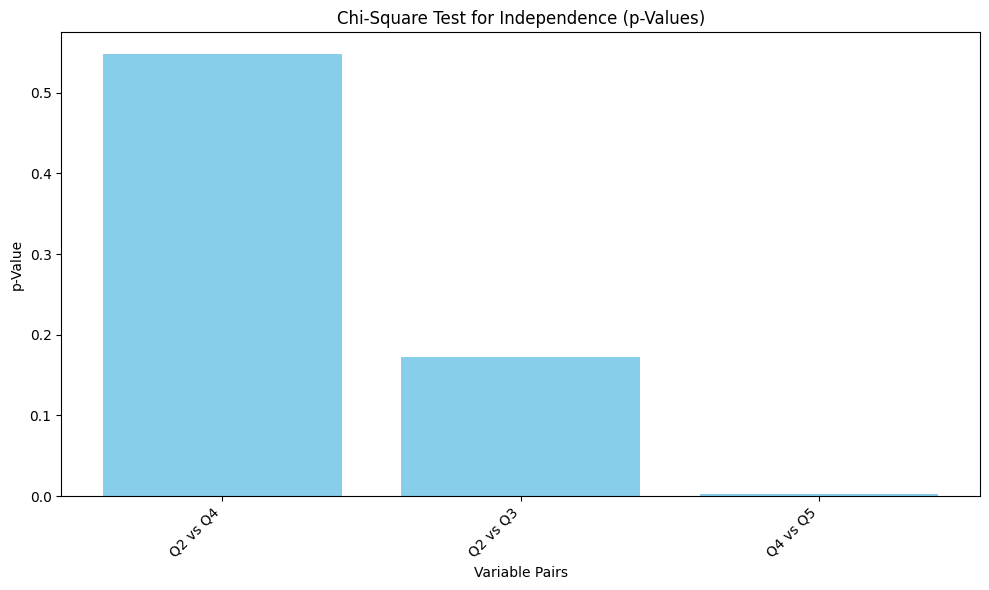

[0.5475218824121151, 0.1729707643951948, 0.0026761097315140224]


In [131]:

import scipy.stats as stats
import matplotlib.pyplot as plt

# Your data, which has been preprocessed as described
# ...

# Create a DataFrame with your encoded data
# This should include only the categorical variables you want to test for independence

# Define a list of pairs of variables to test
variable_pairs = [('Q2', 'Q4'), ('Q2', 'Q3'), ('Q4', 'Q5')]  # Add more pairs as needed

# Initialize lists to store p-values and variable pair names
p_values = []
pair_names = []

# Loop through the variable pairs and perform chi-square tests
for pair in variable_pairs:
    var1, var2 = pair

    # Create a contingency table for the pair
    contingency_data = data[[var1, var2]]
    contingency_table = pd.crosstab(contingency_data[var1], contingency_data[var2])

    # Perform the chi-square test
    _, p, _, _ = stats.chi2_contingency(contingency_table)

    p_values.append(p)
    pair_names.append(f"{var1} vs {var2}")

# Create a grouped bar plot for p-values
plt.figure(figsize=(10, 6))
plt.bar(pair_names, p_values, color='skyblue')
plt.xlabel('Variable Pairs')
plt.ylabel('p-Value')
plt.title('Chi-Square Test for Independence (p-Values)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
# Show the plot
plt.show()
print (p_values)

In [132]:
# import pandas as pd
# import statsmodels.api as sm

# array = data.astype(int)

# Xx = array.drop('Q8', axis=1)  # Features
# yy = array['Q8'].astype(int)  # Target variable

# # Add a constant term to the independent variables (intercept term)
# Xx = sm.add_constant(Xx)

# # Fit the multiple linear regression model
# model = sm.OLS(yy, Xx).fit()

# # Get the model summary
# model_summary = model.summary()

# # Print the model summary
# print(model_summary)

In [133]:
ddd = data.drop('Q8', axis=1)
dat = ddd.astype(int)
dat.head(20)

,Q2,Q3,Q4,Q5,Q1_Ogun State,Q1_Ondo State,Q1_Osun State,Q6_Yes,Q7_Jumia,Q7_Konga,...,Q7_Shopitstoresng,Q7_Wish,Q9_Fraudulent activities,Q9_Poor delivery time,Q9_Product description does not goes with the item delivered,Q9_Product not as quality as it looks online,Q9_Product not good,Q10_Excellent,Q10_Fair,Q10_Good
0,0,2,1,2,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
1,0,2,1,2,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,2,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,2,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,1,2,1,2,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
5,0,2,1,1,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
6,0,0,1,1,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
7,1,0,0,1,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
8,1,2,1,1,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,1
9,0,0,1,2,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1


In [134]:
# Importing libraries
import pandas as pd
import numpy as np

# Subset the relevant variables for your reliability analysis
# Example: columns Q1, Q2, Q3, and Q4 are the items on your scale
items = dat[['Q3','Q4']]

# Check for missing values and handle them if necessary
# items.dropna(inplace=True)

# Calculate Cronbach's Alpha
def cronbach_alpha(dat):
    df_corr = dat.corr()
    N = dat.shape[1]
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

alpha = cronbach_alpha(items)
print("Cronbach's Alpha:", alpha)

Cronbach's Alpha: 0.6565693851253278


In [135]:
# plt.figure(figsize=(20,15))
# sns.heatmap(data.corr(), cmap= "viridis", linecolor="white", annot=True)

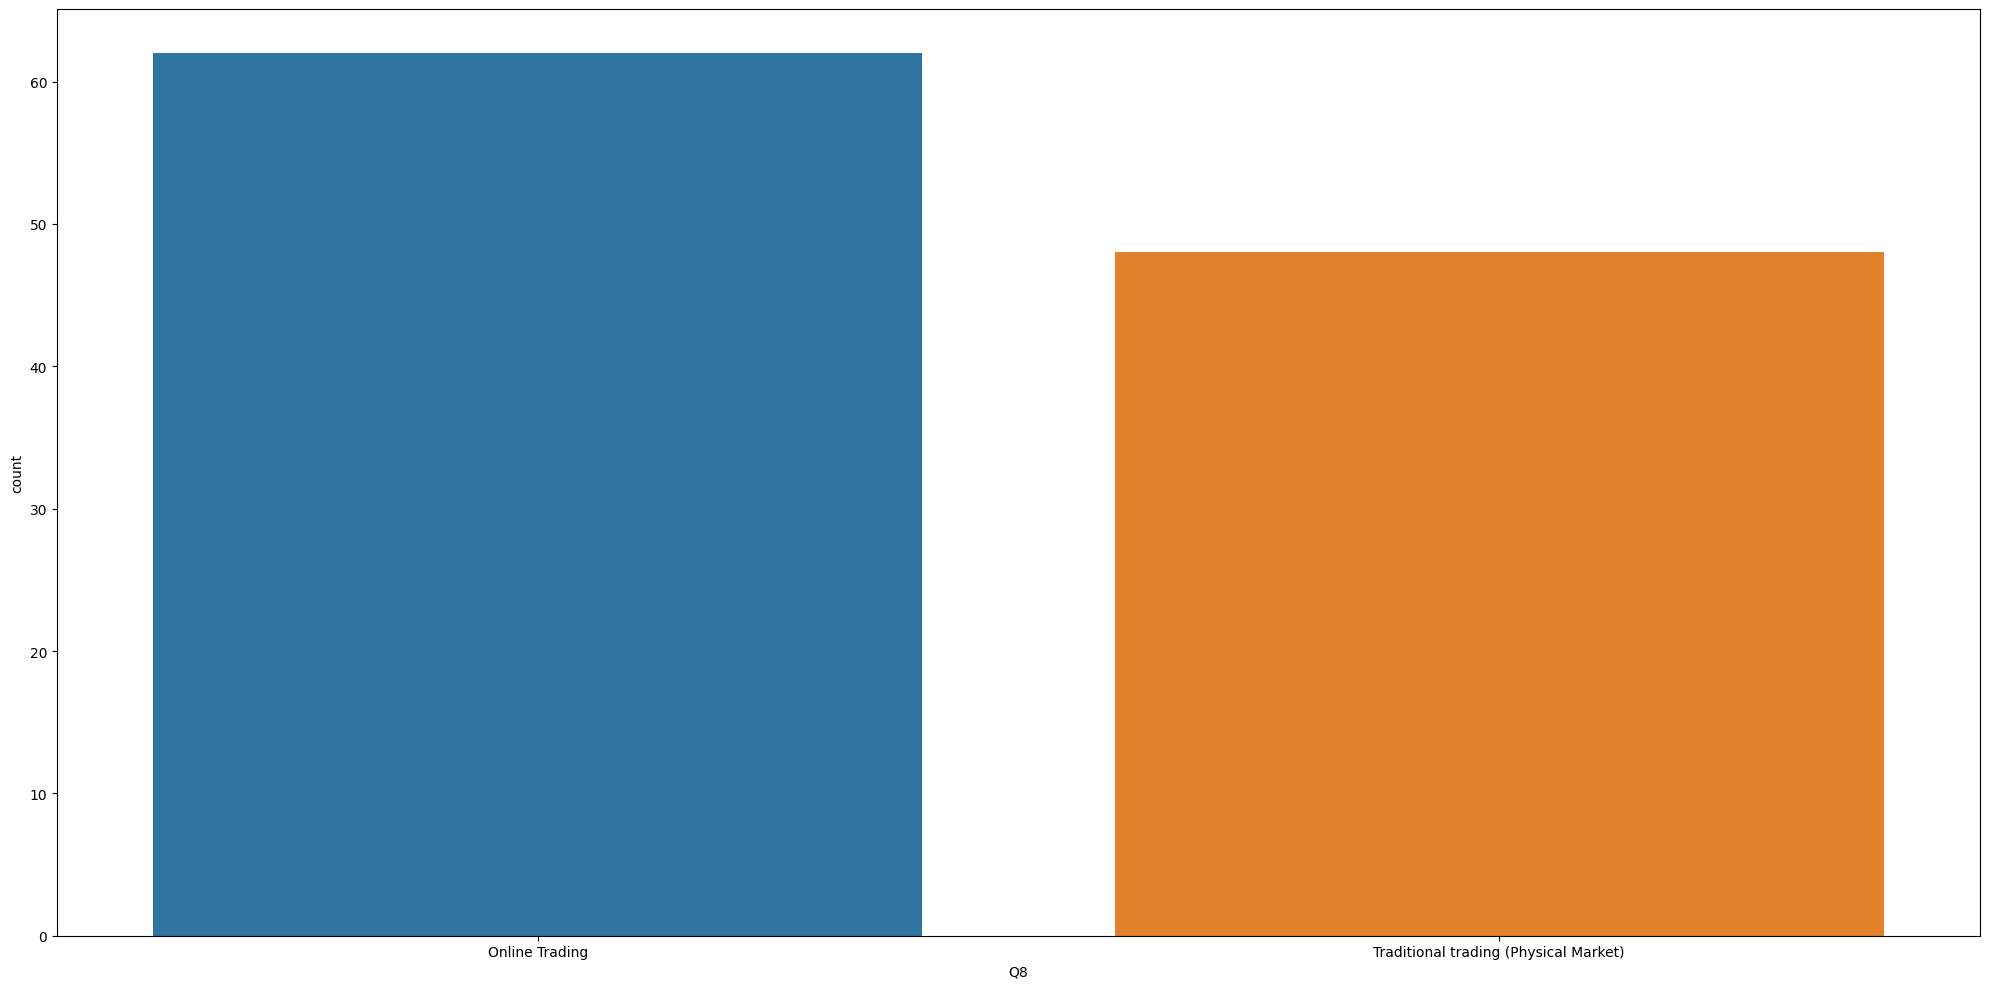

In [136]:
plt.figure(figsize=(20, 10))
sns.countplot(x = 'Q8', data = data)
plt.tight_layout()

In [137]:
# Separating the features and output
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=20)
X.head()

,Q2,Q3,Q4,Q5,Q1_Ogun State,Q1_Ondo State,Q1_Osun State,Q6_Yes,Q7_Jumia,Q7_Konga,...,Q7_Shopitstoresng,Q7_Wish,Q9_Fraudulent activities,Q9_Poor delivery time,Q9_Product description does not goes with the item delivered,Q9_Product not as quality as it looks online,Q9_Product not good,Q10_Excellent,Q10_Fair,Q10_Good
0,0,2,1,2,False,False,False,True,False,False,...,True,False,True,False,False,False,False,True,False,False
1,0,2,1,2,True,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,1,0,2,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,1,2,1,1,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
4,1,2,1,2,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [138]:
print(y_test.shape)
print(y_train.shape)
print(X_train.shape)
print(X_test.shape)

(22,)
(88,)
(88, 23)
(22, 23)


In [139]:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.preprocessing import *

In [140]:
minmax = MinMaxScaler()
minmax.fit(X_train)
X_train = minmax.transform(X_train)
X_test = minmax.transform(X_test)

In [141]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [142]:
# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Model:")
print(" ======== Accuracy Score ======== ")
print(" ")
print(f"{accuracy_score(y_test, nb_predictions)} or {round(accuracy_score(y_test, nb_predictions) * 100, 1)}%")
print(" ")
print(" ======== Confusion Matrix ======== ")
print(" ")
conf_matrix_nb = confusion_matrix(y_test, nb_predictions)

# Define row and column labels
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']

# Print row labels and confusion matrix
for i, label in enumerate(labels):
    row = [label] + list(conf_matrix_nb[i])
    print('\t'.join(map(str, row)))

# Print column headers
print("\t" + '\t'.join(columns))

print(" ")
print(" ======== Classification Report ======== ")
print(" ")
print(classification_report(y_test, nb_predictions))

# SVM Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Model:")
print(" ======== Accuracy Score ======== ")
print(" ")
print(f"{accuracy_score(y_test, svm_predictions)} or {round(accuracy_score(y_test, svm_predictions) * 100, 1)}%")
print(" ")
print(" ======== Confusion Matrix ======== ")
print(" ")
conf_matrix_svm = confusion_matrix(y_test, svm_predictions)

# Print row labels and confusion matrix
for i, label in enumerate(labels):
    row = [label] + list(conf_matrix_svm[i])
    print('\t'.join(map(str, row)))

# Print column headers
print("\t" + '\t'.join(columns))

print(" ")
print(" ======== Classification Report ======== ")
print(" ")
print(classification_report(y_test, svm_predictions))

# ID3 Decision Tree Classifier
id3_classifier = DecisionTreeClassifier()
id3_classifier.fit(X_train, y_train)
id3_predictions = id3_classifier.predict(X_test)
print("ID3 Decision Tree Model:")
print(" ======== Accuracy Score ======== ")
print(" ")
print(f"{accuracy_score(y_test, id3_predictions)} or {round(accuracy_score(y_test, id3_predictions) * 100, 1)}%")
print(" ")
print(" ======== Confusion Matrix ======== ")
print(" ")
conf_matrix_id3 = confusion_matrix(y_test, id3_predictions)

# Print row labels and confusion matrix
for i, label in enumerate(labels):
    row = [label] + list(conf_matrix_id3[i])
    print('\t'.join(map(str, row)))

# Print column headers
print("\t" + '\t'.join(columns))

print(" ")
print(" ======== Classification Report ======== ")
print(" ")
print(classification_report(y_test, id3_predictions))

Naive Bayes Model:
 ======== Accuracy Score ======== 
 
0.7272727272727273 or 72.7%
 
 ======== Confusion Matrix ======== 
 
Actual Negative	12	1
Actual Positive	5	4
	Predicted Negative	Predicted Positive
 
 ======== Classification Report ======== 
 
                                       precision    recall  f1-score   support

                       Online Trading       0.71      0.92      0.80        13
Traditional trading (Physical Market)       0.80      0.44      0.57         9

                             accuracy                           0.73        22
                            macro avg       0.75      0.68      0.69        22
                         weighted avg       0.74      0.73      0.71        22

SVM Model:
 ======== Accuracy Score ======== 
 
0.7727272727272727 or 77.3%
 
 ======== Confusion Matrix ======== 
 
Actual Negative	12	1
Actual Positive	4	5
	Predicted Negative	Predicted Positive
 
 ======== Classification Report ======== 
 
                             

In [143]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
MLPClassifier(max_iter=1000, random_state=42)
pred_y = model.predict(X_test)
print("NN Model:")
print(" ======== Accuracy Score ======== ")
print(" ")
print(f"{accuracy_score(y_test, pred_y)} or {round(accuracy_score(y_test, pred_y) * 100, 1)}%")
print(" ")
print(classification_report(y_test, pred_y))
print(" ======== Confusion Matrix======== ")
cm = confusion_matrix(y_test, pred_y)
# Print row labels and confusion matrix
for i, label in enumerate(labels):
    row = [label] + list(cm[i])
    print('\t'.join(map(str, row)))

# Print column headers
print("\t" + '\t'.join(columns))

NN Model:
 ======== Accuracy Score ======== 
 
0.7272727272727273 or 72.7%
 
                                       precision    recall  f1-score   support

                       Online Trading       0.73      0.85      0.79        13
Traditional trading (Physical Market)       0.71      0.56      0.63         9

                             accuracy                           0.73        22
                            macro avg       0.72      0.70      0.71        22
                         weighted avg       0.73      0.73      0.72        22

 ======== Confusion Matrix======== 
Actual Negative	11	2
Actual Positive	4	5
	Predicted Negative	Predicted Positive


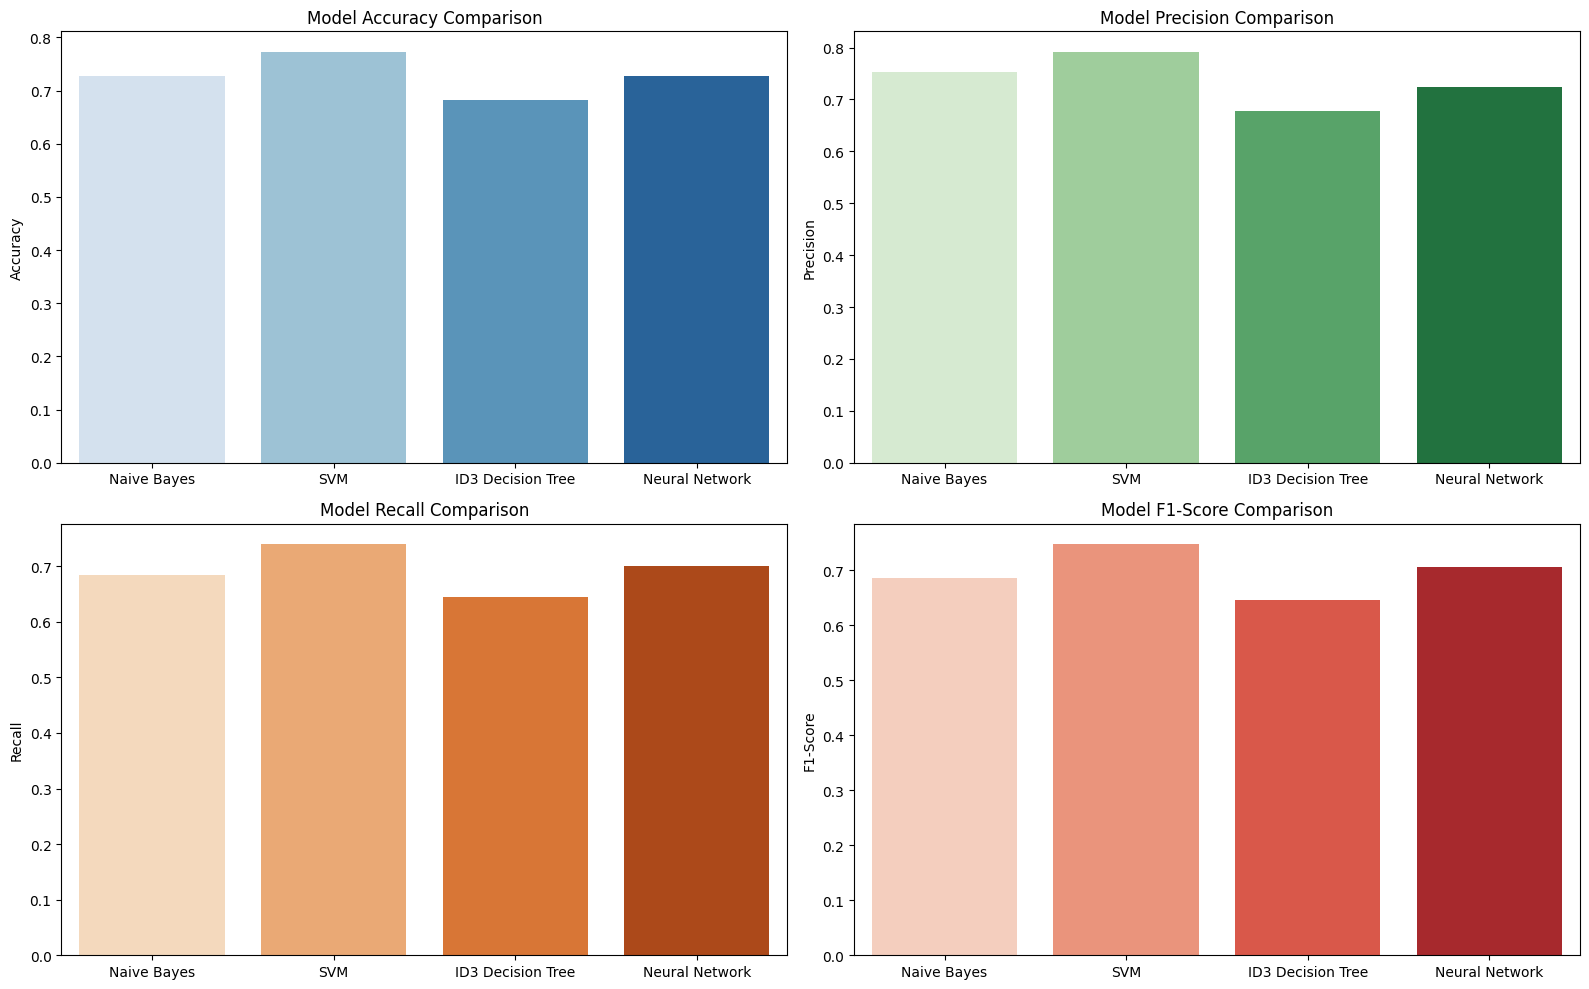

In [144]:
# Define a list of classifiers and their names
classifiers = [
    (MultinomialNB(), "Naive Bayes"),
    (SVC(), "SVM"),
    (DecisionTreeClassifier(), "ID3 Decision Tree"),
    (MLPClassifier(random_state=42, max_iter=1000), "Neural Network")
]

# Initialize lists to store metrics for each classifier
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through classifiers, train, predict, and store metrics
for classifier, name in classifiers:
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, output_dict=True)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(report['macro avg']['precision'])
    recall_scores.append(report['macro avg']['recall'])
    f1_scores.append(report['macro avg']['f1-score'])

# Create bar plots for metrics
plt.figure(figsize=(16, 10))

# Bar plot for Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x=[name for _, name in classifiers], y=accuracy_scores, palette="Blues")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")

# Bar plot for Precision
plt.subplot(2, 2, 2)
sns.barplot(x=[name for _, name in classifiers], y=precision_scores, palette="Greens")
plt.title("Model Precision Comparison")
plt.ylabel("Precision")

# Bar plot for Recall
plt.subplot(2, 2, 3)
sns.barplot(x=[name for _, name in classifiers], y=recall_scores, palette="Oranges")
plt.title("Model Recall Comparison")
plt.ylabel("Recall")

# Bar plot for F1-score
plt.subplot(2, 2, 4)
sns.barplot(x=[name for _, name in classifiers], y=f1_scores, palette="Reds")
plt.title("Model F1-Score Comparison")
plt.ylabel("F1-Score")

plt.tight_layout()
plt.show()


In [145]:
# !pip install factor-analyzer

# import pingouin as pg

# # Create a DataFrame with your survey data
# #data = your_data_frame  # Replace with your actual data

# # Perform Cronbach's Alpha analysis
# alpha = pg.cronbach_alpha(data)

# print("Cronbach's Alpha:", alpha)


In [146]:
# import scipy.stats as stats

# # Perform chi-square test
# chi2, p, _, _ = stats.chi2_contingency(data)

# print("Chi-square statistic:", chi2)
# print("p-value:", p)

                                                          Q2        Q3  \
Q2                                                  1.000000  0.097419   
Q3                                                  0.097419  1.000000   
Q4                                                  0.080541  0.488726   
Q5                                                 -0.177057  0.212728   
Q1_Ogun State                                      -0.054690  0.079022   
Q1_Ondo State                                       0.187424 -0.182271   
Q1_Osun State                                       0.082546 -0.028560   
Q6_Yes                                              0.065695  0.142385   
Q7_Jumia                                           -0.025418  0.197406   
Q7_Konga                                            0.054931 -0.079833   
Q7_Limat ventures                                  -0.089052 -0.036899   
Q7_Olx                                              0.009923 -0.200285   
Q7_Ritzy world fashion                

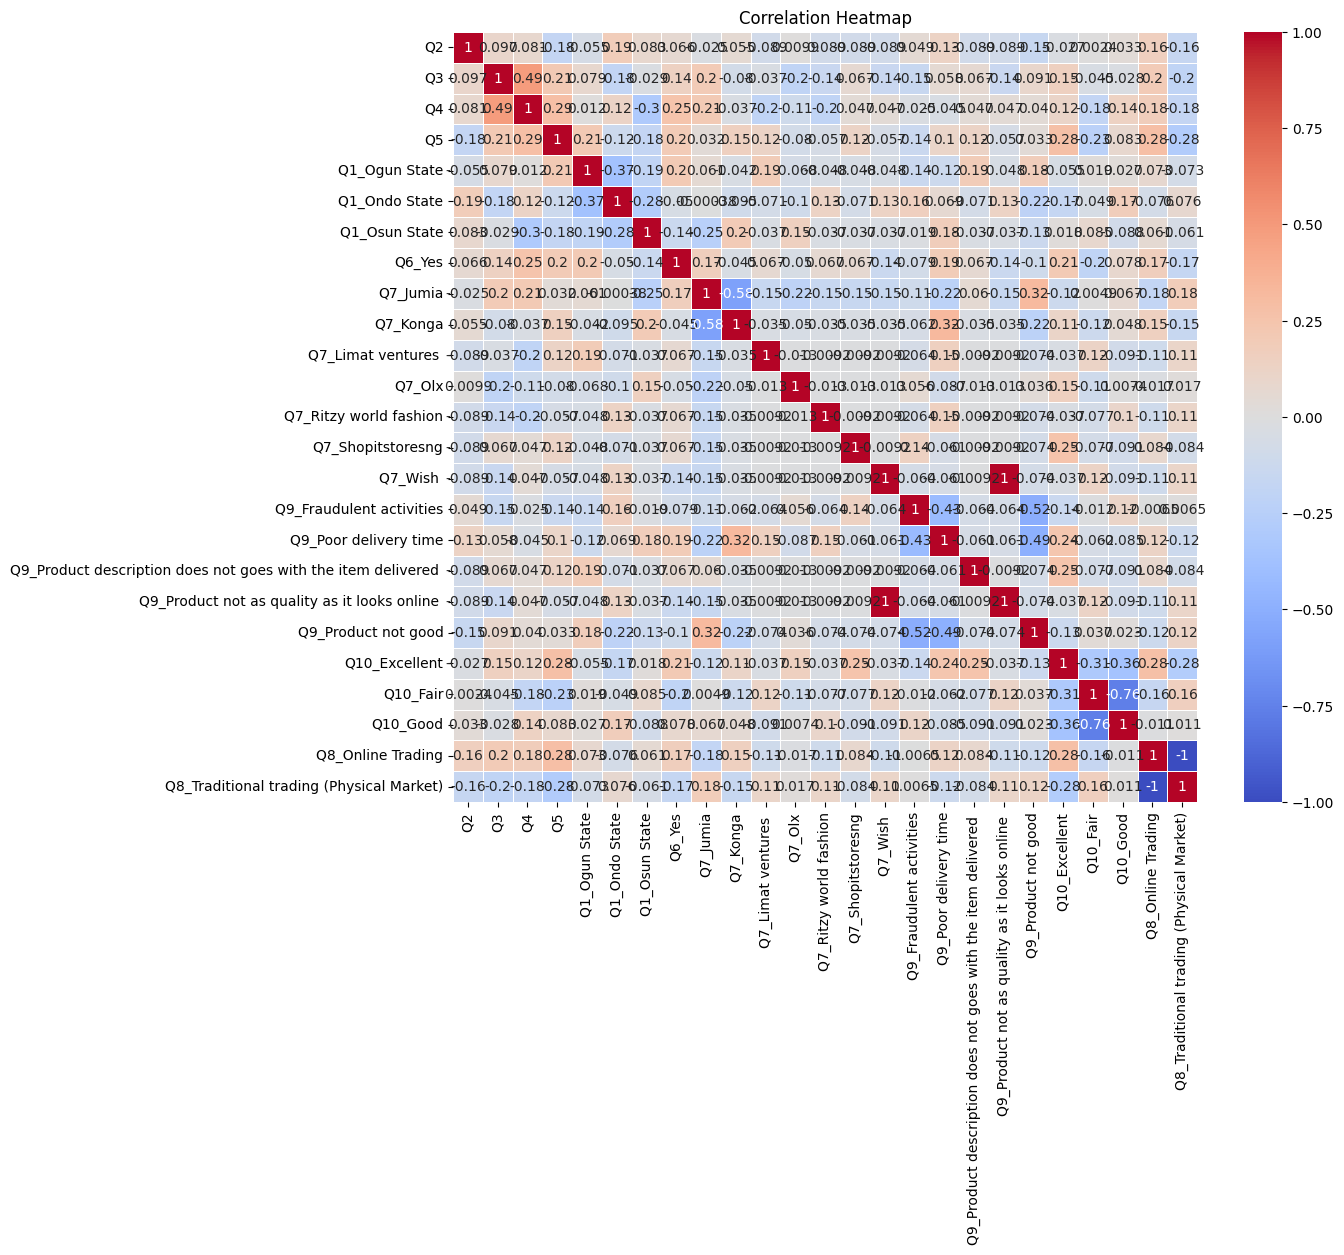

In [147]:
import pandas as pd

# Assuming 'data' is your DataFrame with both numerical and categorical variables
# Replace 'categorical_columns' with the actual names of your categorical columns
categorical_columns = ['Q8']

# Perform one-hot encoding on the categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Now, you can calculate the correlation matrix
correlation_matrix = data_encoded.corr(method='pearson')

# Display the correlation matrix
print(correlation_matrix)

plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

# Customize the colormap (cmap) and other aspects of the heatmap as desired
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()

                            OLS Regression Results                            
Dep. Variable:               Q10_Fair   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.265
Date:                Sat, 14 Oct 2023   Prob (F-statistic):              0.224
Time:                        22:00:40   Log-Likelihood:                -63.396
No. Observations:                 110   AIC:                             168.8
Df Residuals:                      89   BIC:                             225.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

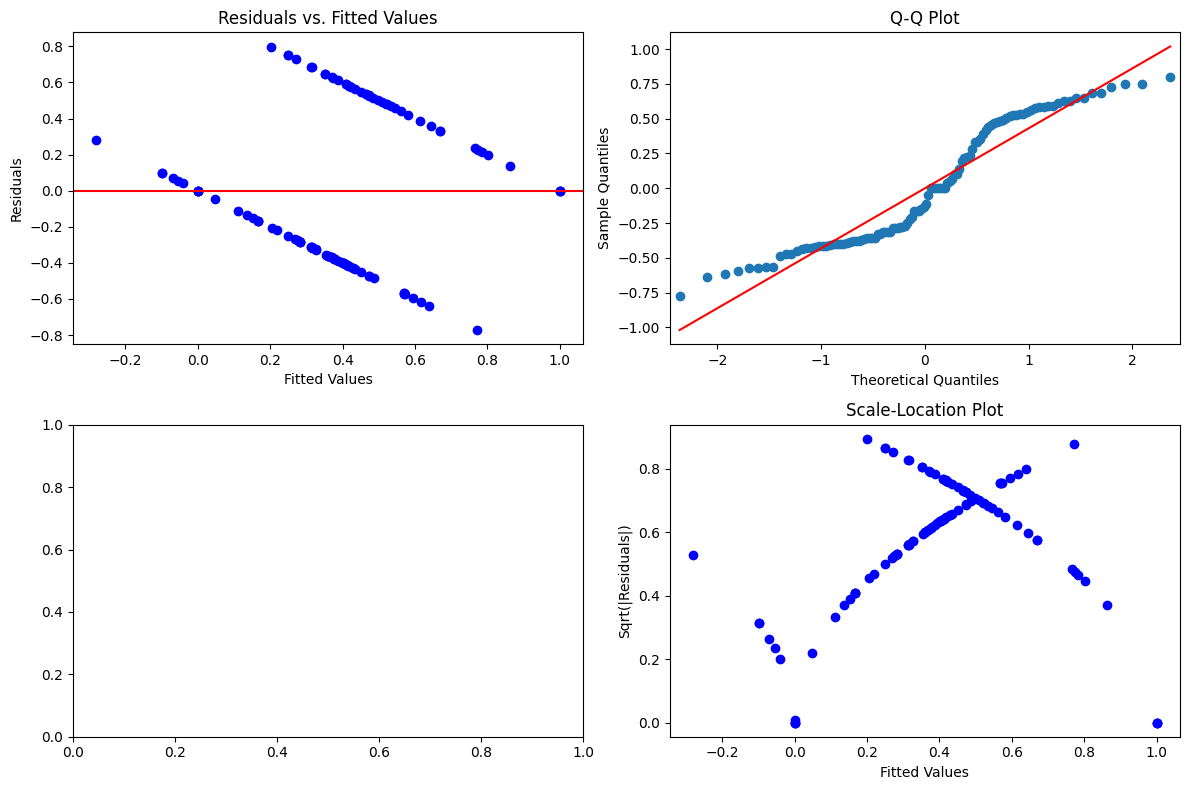

In [148]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'your_array' contains your data
# Convert the array to a DataFrame
data = pd.DataFrame(dat)

# Assuming the last column (e.g., the last but one) contains the target variable 'y'
# You may adjust this based on your actual data structure
y = data.iloc[:, -2]  # Extract the target variable

# Select the independent variables (features)
X = data.iloc[:, :-2]  # Exclude the target variable and any non-numeric columns

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the model summary
model_summary = model.summary()

print(model_summary)

# Get the model residuals
residuals = model.resid

# Create residual plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Residuals vs. Fitted Values
axes[0, 0].scatter(model.fittedvalues, residuals, c='blue')
axes[0, 0].axhline(y=0, color='r', linestyle='-')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs. Fitted Values')

# Q-Q Plot
sm.qqplot(residuals, line='s', ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')

# Residuals vs. Leverage
# sm.graphics.influence_plot(model, ax=axes[1, 0], criterion="cooks")
# axes[1, 0].set_title('Residuals vs. Leverage')

# Scale-Location Plot (Homoscedasticity)
axes[1, 1].scatter(model.fittedvalues, np.sqrt(np.abs(residuals)), c='blue')
axes[1, 1].set_xlabel('Fitted Values')
axes[1, 1].set_ylabel('Sqrt(|Residuals|)')
axes[1, 1].set_title('Scale-Location Plot')

plt.tight_layout()
plt.show()
